In [294]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

# Download and load MTA turnstile data

In [2]:
def all_saturdays(start_date, end_date):
    modified_end_date = datetime.datetime.strptime(end_date,'%m/%d/%Y')+ datetime.timedelta(weeks = 1)
    saturday_list = pd.date_range(start =start_date, end =modified_end_date,
                              freq='W-SAT').strftime('%m/%d/%Y').tolist()
    return saturday_list

In [3]:
def import_mta(date):
    formatted_date = date[-2:]+date[:2]+date[3:5]
    base_url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    date_url = base_url.format(formatted_date)
    date_data = pd.read_csv(date_url)
    return date_data

In [4]:
def mta_to_df(saturday_list):
    dict_of_dfs = {}
    for saturday in saturday_list:
        dict_of_dfs[saturday] = pd.DataFrame(import_mta(saturday))
    mta =pd.DataFrame()
    for val in dict_of_dfs.values():
        mta = pd.concat([mta, val])
    return mta

In [5]:
start_date = input("Enter start date (X/X/XXXX): ")
end_date = input("Enter end date (X/X/XXXX): ")

Enter start date (X/X/XXXX): 3/1/2019
Enter end date (X/X/XXXX): 6/1/2019


In [6]:
saturday_list = all_saturdays(start_date,end_date)

In [7]:
mta = mta_to_df(saturday_list)

In [8]:
mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205006,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/05/2019,17:00:00,RECOVR AUD,5554,379
205007,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/05/2019,21:00:00,REGULAR,5554,379
205008,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/06/2019,01:00:00,REGULAR,5554,379
205009,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/06/2019,05:00:00,REGULAR,5554,379
205010,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/06/2019,09:00:00,REGULAR,5554,379


# In case of later breakage

In [9]:
mta.to_csv(r'mta.csv')

In [10]:
# mta = pd.read_csv('mta.csv')

# Cleaning

## column names

In [11]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3062159 entries, 0 to 205010
Data columns (total 11 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
dtypes: int64(2), obj

In [12]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [13]:
mta.columns = mta.columns.str.strip().str.lower().str.replace('/',"_")

In [14]:
mta.columns

Index(['c_a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

## create datetime column from date and time

In [15]:
mta["datetime"] = pd.to_datetime(mta.date + " " + mta.time, format="%m/%d/%Y %H:%M:%S")

In [16]:
mta.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112,2019-02-23 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125,2019-02-23 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199,2019-02-23 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248,2019-02-23 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292,2019-02-23 19:00:00


## filter to previously specified dates

In [17]:
mta.date.value_counts().sort_index()

02/23/2019    28827
02/24/2019    29109
02/25/2019    28842
02/26/2019    29777
02/27/2019    28903
              ...  
06/03/2019    30022
06/04/2019    29513
06/05/2019    29484
06/06/2019    29213
06/07/2019    28745
Name: date, Length: 105, dtype: int64

In [18]:
mta.date = pd.to_datetime(mta.date,format="%m/%d/%Y")

In [19]:
mta = mta[(mta.date >= start_date)]

In [20]:
mta = mta[(mta.date <= end_date)]

In [21]:
mta.date.value_counts().sort_index()

2019-03-01    28691
2019-03-02    29234
2019-03-03    28836
2019-03-04    29067
2019-03-05    29234
              ...  
2019-05-28    28873
2019-05-29    29095
2019-05-30    29190
2019-05-31    29651
2019-06-01    29066
Name: date, Length: 93, dtype: int64

In [22]:
mta.drop(columns = ['time'], inplace = True)

In [23]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711716 entries, 36 to 204983
Data columns (total 11 columns):
c_a         object
unit        object
scp         object
station     object
linename    object
division    object
date        datetime64[ns]
desc        object
entries     int64
exits       int64
datetime    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 248.3+ MB


In [24]:
mta.head(10)

,c_a,unit,scp,station,linename,division,date,desc,entries,exits,datetime
36,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962094,2361672,2019-03-01 03:00:00
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962111,2361714,2019-03-01 07:00:00
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962243,2362017,2019-03-01 11:00:00
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6962502,2362082,2019-03-01 15:00:00
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6963303,2362149,2019-03-01 19:00:00
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6963578,2362196,2019-03-01 23:00:00
78,A002,R051,02-00-01,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6209663,1392692,2019-03-01 03:00:00
79,A002,R051,02-00-01,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6209673,1392711,2019-03-01 07:00:00
80,A002,R051,02-00-01,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6209797,1392838,2019-03-01 11:00:00
81,A002,R051,02-00-01,59 ST,NQR456W,BMT,2019-03-01,REGULAR,6209986,1392887,2019-03-01 15:00:00


## duplicates

In [25]:
(mta
 .groupby(["c_a", "unit", "scp", "station", "datetime"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(50)

,c_a,unit,scp,station,datetime,entries
716178,N071,R013,00-06-00,34 ST-PENN STA,2019-04-20 08:00:00,2
2215449,R283,R221,00-00-01,167 ST,2019-04-16 04:00:00,2
1325112,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-26 13:00:00,2
1325111,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-26 09:00:00,2
535277,JFK03,R536,00-00-02,JFK JAMAICA CT1,2019-04-07 01:00:00,2
637616,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
1325110,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-26 05:00:00,2
1325108,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 21:00:00,2
1325107,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 17:00:00,2
895018,N135,R385,01-03-01,ROCKAWAY BLVD,2019-03-31 13:00:00,2


In [26]:
# mask = ((mta["c_a"] == "G009") & 
#     (mta["unit"] == "R151") & 
#     (mta["scp"] == "02-00-04") & 
#     (mta["station"] == "CONEY IS-STILLW") &
#     (mta["datetime"] == "2019-05-16 17:00:00"))
# mta[mask].head(10)

In [27]:
mta.sort_values(["c_a", "unit", "scp", "station", "datetime"], inplace=True, ascending=False)
mta.drop_duplicates(subset=["c_a", "unit", "scp", "station", "datetime"], inplace=True)

In [28]:
(mta
 .groupby(["c_a", "unit", "scp", "station", "datetime"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(10)

,c_a,unit,scp,station,datetime,entries
0,A002,R051,02-00-00,59 ST,2019-03-01 03:00:00,1
1807759,R141,R031,00-06-00,34 ST-PENN STA,2019-04-26 08:00:00,1
1807761,R141,R031,00-06-00,34 ST-PENN STA,2019-04-26 16:00:00,1
1807762,R141,R031,00-06-00,34 ST-PENN STA,2019-04-26 20:00:00,1
1807763,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 00:00:00,1
1807764,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 04:00:00,1
1807765,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 08:00:00,1
1807766,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 12:00:00,1
1807767,R141,R031,00-06-00,34 ST-PENN STA,2019-04-27 16:00:00,1
1807768,R141,R031,00-06-00,34 ST-PENN STA,2019-04-28 00:00:00,1


In [29]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711648 entries, 204983 to 36
Data columns (total 11 columns):
c_a         object
unit        object
scp         object
station     object
linename    object
division    object
date        datetime64[ns]
desc        object
entries     int64
exits       int64
datetime    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 248.3+ MB


## daily entries by turnstile

In [30]:
mta.head(10)

,c_a,unit,scp,station,linename,division,date,desc,entries,exits,datetime
204983,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-01,REGULAR,5554,379,2019-06-01 21:00:00
204982,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-01,REGULAR,5554,379,2019-06-01 17:00:00
204981,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-01,REGULAR,5554,379,2019-06-01 13:00:00
204980,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-01,REGULAR,5554,379,2019-06-01 09:00:00
204979,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-01,REGULAR,5554,378,2019-06-01 05:00:00
204978,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-01,REGULAR,5554,378,2019-06-01 01:00:00
203794,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-31,REGULAR,5554,378,2019-05-31 21:00:00
203793,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-31,REGULAR,5554,378,2019-05-31 17:00:00
203792,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-31,REGULAR,5554,378,2019-05-31 13:00:00
203791,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-05-31,REGULAR,5554,378,2019-05-31 12:10:52


In [31]:
by_turnstile_date = mta.groupby(['c_a', 'unit', 'scp', 'station', mta.datetime.dt.date])

In [32]:
mta_daily = by_turnstile_date['entries'].min().reset_index()

In [33]:
mta_daily.describe([.95,.997])

,entries
count,4.494290e+05
mean,4.090311e+07
std,2.101619e+08
min,0.000000e+00
50%,2.183229e+06
95%,1.174405e+08
99.7%,1.924460e+09
max,2.129446e+09


In [34]:
mta_daily['daily_entries'] = mta_daily.groupby(['c_a', 'unit', 'scp', 'station'])['entries'].diff().shift(-1)

In [35]:
#dropping rows with negative daily entries
mta_daily = mta_daily[mta_daily.daily_entries >= 0]

In [36]:
#dropping rows with the top .3% of daily entries
mta_daily = mta_daily[mta_daily.daily_entries < mta_daily.daily_entries.quantile(q =.997)]

In [37]:
mta_daily

,c_a,unit,scp,station,datetime,entries,daily_entries
0,A002,R051,02-00-00,59 ST,2019-03-01,6962094,1528.0
1,A002,R051,02-00-00,59 ST,2019-03-02,6963622,741.0
2,A002,R051,02-00-00,59 ST,2019-03-03,6964363,541.0
3,A002,R051,02-00-00,59 ST,2019-03-04,6964904,1239.0
4,A002,R051,02-00-00,59 ST,2019-03-05,6966143,1481.0
...,...,...,...,...,...,...,...
449423,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-05-27,5554,0.0
449424,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-05-28,5554,0.0
449425,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-05-29,5554,0.0
449426,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-05-30,5554,0.0


In [38]:
mta_daily.describe()

,entries,daily_entries
count,4.387250e+05,438725.000000
mean,3.006325e+07,1029.941738
std,1.673488e+08,971.748307
min,0.000000e+00,0.000000
25%,3.417330e+05,254.000000
50%,2.118734e+06,786.000000
75%,6.484883e+06,1553.000000
max,2.115842e+09,5471.000000


# Determining Which Stations Have The Highest Traffic

In [48]:
mta_daily['datetime'] = pd.to_datetime(mta_daily.datetime,format="%Y-%m-%d")

In [83]:
grouped_by_station_and_week = mta_daily.groupby(['station',mta_daily.datetime.dt.week])['daily_entries'].agg([np.sum]).reset_index()
grouped_by_station_and_week = grouped_by_station_and_week.rename(columns={'datetime': 'week', 'sum':'weekly_entries'})

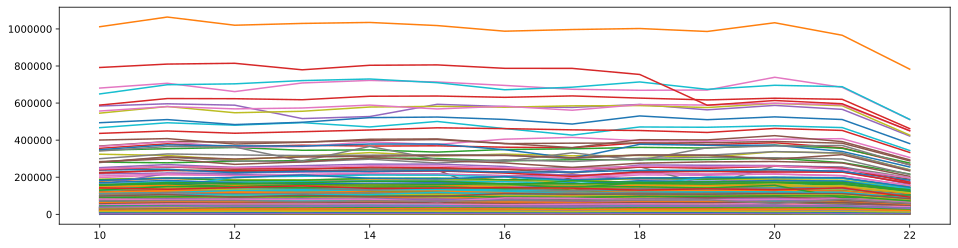

In [84]:
plt.figure(figsize=(16,4))

unique_stations = grouped_by_station_and_week.station.unique()
for sta in unique_stations:
    single_station = grouped_by_station_and_week[grouped_by_station_and_week.station == sta].groupby(["week"])['weekly_entries'].agg(['max'])
    plt.plot(single_station[1:]);

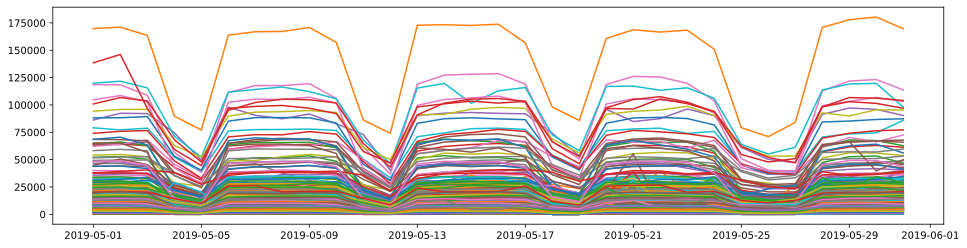

In [114]:
grouped_by_station_and_day = mta_daily.groupby(['station', mta_daily.datetime.dt.date])['daily_entries'].agg([np.sum])
grouped_by_station_and_day = grouped_by_station_and_day.reset_index().rename(columns={'sum': 'daily_entries', 'datetime': 'date'})

plt.figure(figsize=(16,4))

for sta in unique_stations:
    single_station = grouped_by_station_and_day[grouped_by_station_and_day.station == sta].groupby(["date"])['daily_entries'].agg(['max'])
    plt.plot(single_station[single_station.index >= pd.to_datetime('2019-05-01').date()]);

In [135]:
grp_sta_wk_mean = grouped_by_station_and_week.groupby('station')['weekly_entries'].agg(['mean'])
grp_sta_wk_mean = grp_sta_wk_mean.sort_values(by='mean', ascending=False)[:10]
grp_sta_wk_mean

,mean
station,
34 ST-PENN STA,944586.857143
GRD CNTRL-42 ST,686571.071429
34 ST-HERALD SQ,648361.785714
23 ST,646117.071429
TIMES SQ-42 ST,581967.857143
FULTON ST,540385.428571
42 ST-PORT AUTH,537313.071429
14 ST-UNION SQ,535694.785714
86 ST,475236.714286


In [136]:
grp_sta_day_mean = grouped_by_station_and_day.groupby('station')['daily_entries'].agg(['mean'])
grp_sta_day_mean = grp_sta_day_mean.sort_values(by='mean', ascending=False)[:10]
grp_sta_day_mean

,mean
station,
34 ST-PENN STA,143741.478261
GRD CNTRL-42 ST,104478.206522
34 ST-HERALD SQ,98663.750000
23 ST,98322.163043
TIMES SQ-42 ST,88560.326087
FULTON ST,82232.565217
42 ST-PORT AUTH,81765.032609
14 ST-UNION SQ,81518.771739
86 ST,72318.630435


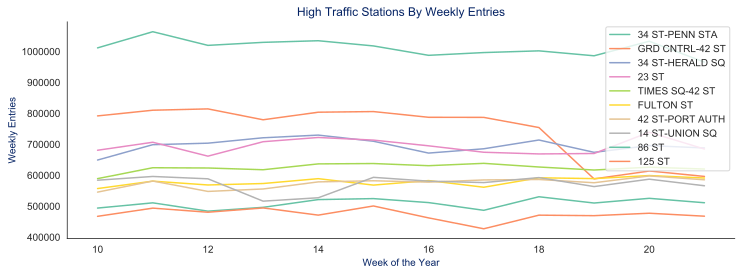

In [310]:
top_ten_stations = grp_sta_wk_mean.index.unique()

plt.figure(figsize=(12,4))

for sta in top_ten_stations:
    single_station = grouped_by_station_and_week[grouped_by_station_and_week.station == sta]#.groupby(["week"])['weekly_entries'].agg(['max'])
    time_plot = sns.lineplot(x=single_station.week[1:-1], y = single_station.weekly_entries[1:-1], label=sta);
    #plt.plot(single_station[1:-1], label=sta)
    
plt.legend(loc=1);
time_plot.legend(loc=1, fontsize='10');
time_plot.set_title('High Traffic Stations By Weekly Entries', color=brand_blue)
time_plot.set_ylabel('Weekly Entries', color=brand_blue)
time_plot.set_xlabel('Week of the Year', color=brand_blue);
sf=ScalarFormatter()
sf.set_scientific(True)
time_plot.yaxis.set_major_formatter(sf)
sns.despine()
sns.set_style('white')
sns.set_palette("Set2");

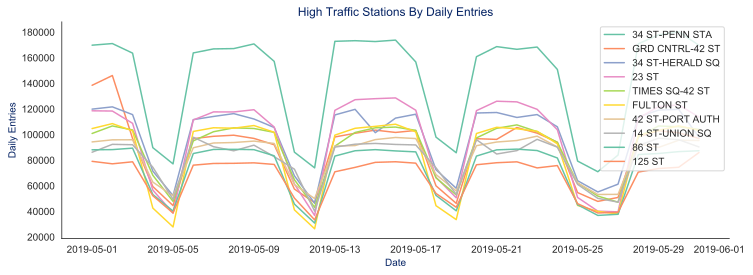

In [309]:
plt.figure(figsize=(12,4))
brand_blue = '#042263FF'
for sta in top_ten_stations:
    single_station = grouped_by_station_and_day[grouped_by_station_and_day.station == sta]#.groupby(["date"])['daily_entries'].agg(['max'])
    ss_boundary = single_station[single_station.date >= pd.to_datetime('2019-05-01').date()]
    time_plot = sns.lineplot(x=ss_boundary.date, y = ss_boundary.daily_entries, label=sta);
    
time_plot.legend(loc=1, fontsize='10');
time_plot.set_title('High Traffic Stations By Daily Entries', color=brand_blue)
time_plot.set_ylabel('Daily Entries', color=brand_blue)
time_plot.set_xlabel('Date', color=brand_blue);
sns.despine()
sns.set_style('white')
sns.set_palette("Set2");

**NEED TO SET Y AXIS ON ABOVE TO SCIENTIFIC**

# Subway Locations

In [181]:
locations = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [182]:
stored_for_errors = locations.copy()

In [183]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
Station ID               496 non-null int64
Complex ID               496 non-null int64
GTFS Stop ID             496 non-null object
Division                 496 non-null object
Line                     496 non-null object
Stop Name                496 non-null object
Borough                  496 non-null object
Daytime Routes           496 non-null object
Structure                496 non-null object
GTFS Latitude            496 non-null float64
GTFS Longitude           496 non-null float64
North Direction Label    478 non-null object
South Direction Label    481 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 50.5+ KB


In [186]:
locations.columns = locations.columns.str.strip().str.lower().str.replace('/',"_").str.replace(' ', '_')

,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [328]:
locations['stop_name'] = locations.stop_name.str.upper().str.strip()
locations

,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,1,1,R01,BMT,Astoria,ASTORIA - DITMARS BLVD,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,ASTORIA BLVD,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 AV,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,BROADWAY,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 AV,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,517,517,S15,SIR,Staten Island,PRINCE'S BAY,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville
492,518,518,S14,SIR,Staten Island,PLEASANT PLAINS,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville
493,519,519,S13,SIR,Staten Island,RICHMOND VALLEY,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville
494,522,522,S09,SIR,Staten Island,TOTTENVILLE,SI,SIR,At Grade,40.512764,-74.251961,St George,NaN


In [338]:
#cols_in_both = [val for val in mta_daily.station if val in locations.stop_name]
cols_in_only_mta_daily = [val for val in mta_daily.station.unique() if val not in locations.stop_name.unique()]
cols_in_location_only = [val for val in locations.stop_name.unique() if val not in mta_daily.station.unique()]
sorted(cols_in_location_only)

['103 ST - CORONA PLAZA',
 '116 ST - COLUMBIA UNIVERSITY',
 '137 ST - CITY COLLEGE',
 '138 ST - GRAND CONCOURSE',
 '14 ST - UNION SQ',
 '149 ST - GRAND CONCOURSE',
 '15 ST - PROSPECT PARK',
 '161 ST - YANKEE STADIUM',
 '163 ST - AMSTERDAM AV',
 '168 ST - WASHINGTON HTS',
 '21 ST - QUEENSBRIDGE',
 '3 AV - 138 ST',
 '3 AV - 149 ST',
 '34 ST - 11 AV',
 '34 ST - HERALD SQ',
 '34 ST - PENN STATION',
 '4 AV',
 '40 ST',
 '42 ST - BRYANT PK',
 '42 ST - PORT AUTHORITY BUS TERMINAL',
 '47-50 STS - ROCKEFELLER CTR',
 '5 AV',
 '57 ST - 7 AV',
 '59 ST - COLUMBUS CIRCLE',
 '62 ST',
 '63 DR - REGO PARK',
 '66 ST - LINCOLN CENTER',
 '68 ST - HUNTER COLLEGE',
 '74 ST - BROADWAY',
 '75 ST',
 '8 ST - NYU',
 '81 ST - MUSEUM OF NATURAL HISTORY',
 '82 ST - JACKSON HTS',
 '85 ST - FOREST PKWY',
 '9 ST',
 '90 ST - ELMHURST AV',
 'ANNADALE',
 'AQUEDUCT - N CONDUIT AV',
 'AQUEDUCT RACETRACK',
 'ARTHUR KILL',
 'ASTORIA - DITMARS BLVD',
 'ATLANTIC AV - BARCLAYS CTR',
 'BAY RIDGE - 95 ST',
 'BAY TERRACE',
 'BEDFOR

In [330]:
sorted(locations.stop_name.unique())

['1 AV',
 '103 ST',
 '103 ST - CORONA PLAZA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST - COLUMBIA UNIVERSITY',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST - CITY COLLEGE',
 '138 ST - GRAND CONCOURSE',
 '14 ST',
 '14 ST - UNION SQ',
 '145 ST',
 '149 ST - GRAND CONCOURSE',
 '15 ST - PROSPECT PARK',
 '155 ST',
 '157 ST',
 '161 ST - YANKEE STADIUM',
 '163 ST - AMSTERDAM AV',
 '167 ST',
 '168 ST',
 '168 ST - WASHINGTON HTS',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST - QUEENSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST',
 '3 AV',
 '3 AV - 138 ST',
 '3 AV - 149 ST',
 '30 AV',
 '33 ST',
 '34 ST - 11 AV',
 '34 ST - HERALD SQ',
 '34 ST - PENN STATION',
 '36 AV',
 '36 ST',
 '39 AV',
 '4 AV',
 '40 ST',
 '42 ST - BRYANT PK',
 '42 ST - PORT AUTHORITY BUS TERMINAL',
 '4

In [326]:
sorted(mta_daily.station.unique())

['1 AV',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST',
 '14 ST-UNION SQ',
 '145 ST',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST',
 '3 AV',
 '3 AV 138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '33 ST-RAWSON ST',
 '34 ST-HERALD SQ',
 '34 ST-HUDSON YD',
 '34 ST-PENN STA',
 '36 AV',
 '36 ST',
 '39 AV',
 '4 AV-9 ST',
 '40 ST LOWERY ST',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '45 ST',
 '46 ST',
 '46 ST BLISS ST',
 '47-50 STS ROCK',
 '49 ST',
 '4AV-9 ST',
 '5 AV